# Pymaceuticals Inc.
---

### Analysis

- Claire Fraser
- 11/20/23
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
from scipy import stats

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
mouse_metadata.dtypes
mouse_metadata.head()
study_results.head()

combo = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID"])
combo_df = pd.DataFrame(combo)
combo_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
# Checking the number of mice.
print(combo_df['Mouse ID'].nunique())
print(len(combo_df['Mouse ID']))

249
1893


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = combo_df.duplicated(['Mouse ID', 'Timepoint'], keep='first')

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
print(combo_df[duplicates])

     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
137      g989          0           45.000000                 0     Propriva   
360      g989          5           47.570392                 0     Propriva   
681      g989         10           49.880528                 0     Propriva   
869      g989         15           53.442020                 0     Propriva   
1111     g989         20           54.657650                 1     Propriva   

         Sex  Age_months  Weight (g)  
137   Female          21          26  
360   Female          21          26  
681   Female          21          26  
869   Female          21          26  
1111  Female          21          26  


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
no_duplicates = combo_df.drop_duplicates(['Mouse ID', 'Timepoint'])
#print(combo_df)
#print(no_duplicates)
# Checking the number of mice in the clean DataFrame.
print(no_duplicates['Mouse ID'].nunique())
print(len(no_duplicates['Mouse ID']))

249
1888


## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
regimen = no_duplicates.groupby(['Drug Regimen'])
#print(regimen)
reg_tumorvolume = regimen['Tumor Volume (mm3)']

regimen_mean = reg_tumorvolume.mean()
regimen_median = reg_tumorvolume.median()
regimen_var = reg_tumorvolume.var()
regimen_std = reg_tumorvolume.std()

summary = pd.merge(regimen_mean, regimen_median, how="left", on=['Drug Regimen'])
summary = summary.rename(columns={'Tumor Volume (mm3)_x':'Tumor Volume Mean (mm3)',
                                 'Tumor Volume (mm3)_y':'Tumor Volume Median (mm3)'})
summary = pd.merge(summary, regimen_var, how="left", on=['Drug Regimen'])
summary = summary.rename(columns={'Tumor Volume (mm3)':'Tumor Volume Variance (mm3)'})
summary = pd.merge(summary, regimen_std, how="left", on=['Drug Regimen'])
summary = summary.rename(columns={'Tumor Volume (mm3)':'Tumor Volume Standard Deviation'})
                           
#summary.head()
#print(regimen_var)
summary_df = pd.DataFrame(summary)
print(summary_df)
stderr = reg_tumorvolume.sem()
print(stderr)

              Tumor Volume Mean (mm3)  Tumor Volume Median (mm3)  \
Drug Regimen                                                       
Capomulin                   40.675741                  41.557809   
Ceftamin                    52.591172                  51.776157   
Infubinol                   52.884795                  51.820584   
Ketapril                    55.235638                  53.698743   
Naftisol                    54.331565                  52.509285   
Placebo                     54.033581                  52.288934   
Propriva                    52.393463                  50.909965   
Ramicane                    40.216745                  40.673236   
Stelasyn                    54.233149                  52.431737   
Zoniferol                   53.236507                  51.818479   

              Tumor Volume Variance (mm3)  Tumor Volume Standard Deviation  
Drug Regimen                                                                
Capomulin                    

In [7]:
# Assemble the resulting series into a single summary DataFrame.
all_tumor_stats = pd.merge(summary, stderr, how="left", on=["Drug Regimen"])
all_tumor_stats = all_tumor_stats.rename(columns={'Tumor Volume (mm3)':'SEM'})
all_tumor_stats

,Tumor Volume Mean (mm3),Tumor Volume Median (mm3),Tumor Volume Variance (mm3),Tumor Volume Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
summary = reg_tumorvolume.agg(['mean', 'median', 'var', 'std', 'sem'])
summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen = no_duplicates.groupby(['Drug Regimen'])
print(regimen)

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

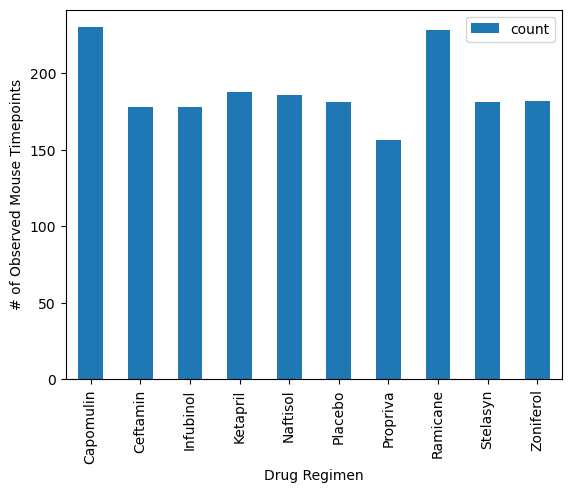

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_counts = pd.DataFrame(regimen['Drug Regimen'].value_counts())
drug_counts.plot(kind="bar", ylabel="# of Observed Mouse Timepoints")

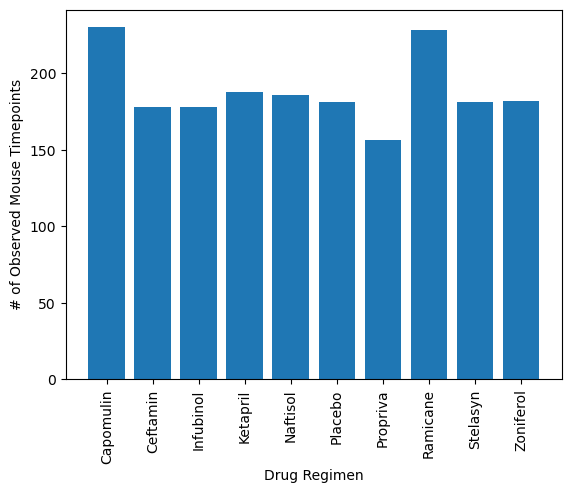

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_counts = regimen['Drug Regimen'].value_counts()
x_values = drug_counts.index
y_values = drug_counts
plt.bar(x_values, y_values)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)
plt.show()

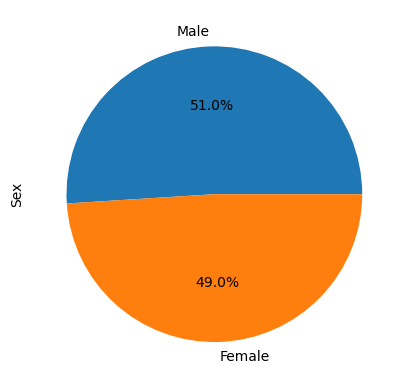

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_counts = pd.DataFrame(no_duplicates['Sex'].value_counts())
labels = ["Male", "Female"]
sex_counts["Percentage"] = ((sex_counts["count"] / sex_counts["count"].sum()) * 100).round()

sex_counts.plot(kind='pie', y='Percentage', labels=labels, autopct="%1.1f%%", legend=False)
plt.ylabel("Sex")
plt.show()

#plt.legend(labels=labels, title="")


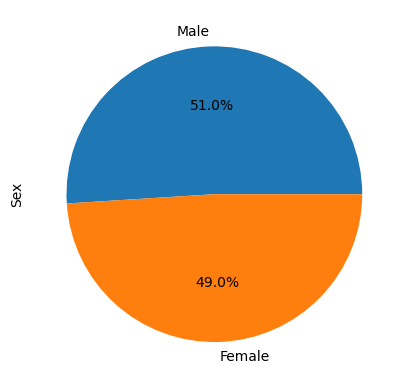

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_counts.plot.pie(y='Percentage', labels=labels, autopct="%1.1f%%", legend=False)
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [21]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
latest = pd.DataFrame(no_duplicates.loc[(no_duplicates['Timepoint'] == 45), :])
latest_volume = latest[['Mouse ID', 'Tumor Volume (mm3)']]
latest_volume
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
updated_cleandf = pd.merge(latest_volume, no_duplicates, how="left", on=["Mouse ID"])
updated_cleandf = updated_cleandf.rename(columns={'Tumor Volume (mm3)_y':'Tumor Volume at Timepoint 45',
                                                 'Tumor Volume (mm3)_x':'Tumor Volume (mm3)'})
updated_cleandf = updated_cleandf.reset_index()
print(updated_cleandf)


      index Mouse ID  Tumor Volume (mm3)  Timepoint  \
0         0     n364           31.095335          0   
1         1     n364           31.095335          5   
2         2     n364           31.095335         10   
3         3     n364           31.095335         15   
4         4     n364           31.095335         20   
...     ...      ...                 ...        ...   
1295   1295     b879           72.555239         25   
1296   1296     b879           72.555239         30   
1297   1297     b879           72.555239         35   
1298   1298     b879           72.555239         40   
1299   1299     b879           72.555239         45   

      Tumor Volume at Timepoint 45  Metastatic Sites Drug Regimen     Sex  \
0                        45.000000                 0     Ramicane    Male   
1                        45.521875                 0     Ramicane    Male   
2                        40.375138                 0     Ramicane    Male   
3                        36.940

Capomulin potential outliers: 148    25.472143
149    23.343598
Name: Tumor Volume at Timepoint 45, dtype: float64
Ramicane potential outliers: 299    22.050126
Name: Tumor Volume at Timepoint 45, dtype: float64
Infubinol potential outliers: Series([], Name: Tumor Volume at Timepoint 45, dtype: float64)
Ceftamin potential outliers: Series([], Name: Tumor Volume at Timepoint 45, dtype: float64)


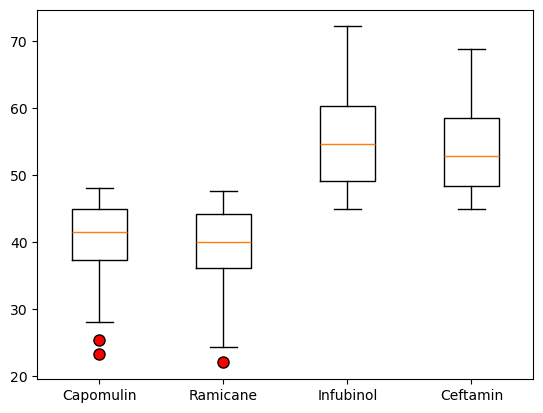

In [22]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
treatment_list = []
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment:
    for trials in range(len(updated_cleandf['Mouse ID'])):
            
    # Locate the rows which contain mice on each drug and get the tumor volumes
        if updated_cleandf['Drug Regimen'][trials] == drug:
        # add subset
            treatment_list.append(updated_cleandf['Drug Regimen'][trials])
            tumor_vol.append(updated_cleandf['Tumor Volume at Timepoint 45'][trials])

merged_df = pd.DataFrame(list(zip(treatment_list, tumor_vol)), columns=['Drug Regimen', 'Tumor Volume at Timepoint 45'])
#print(merged_df)

d_regimen = []
quart = []
lq = []
uq = []
lowerb = []
upperb = []
# Use loop to calculate the stats for each drug regimen
for drug in treatment:
    trunk = merged_df.loc[merged_df['Drug Regimen'] == drug, 'Tumor Volume at Timepoint 45']
    d_regimen.append(drug)
    quartiles = trunk.quantile([.25, .5, .75])
    quart.append(quartiles)
    lowerq = quartiles[.25]
    lq.append(lowerq)
    upperq = quartiles[.75]
    uq.append(upperq)
    iqr = round(upperq - lowerq, 2)
    
    lower_bound = round(lowerq - (1.5*iqr))
    lowerb.append(lower_bound)
    upper_bound = round(upperq + (1.5*iqr))
    upperb.append(upper_bound)
    #print(f'The quartiles for {drug} are {quartiles}')
    #print(f'The IQR for {drug} is {iqr}')
    #print(f'The lower bound is {lower_bound}')
    #print(f'The upper bound is {upper_bound}')
    outliers = (trunk < lower_bound) | (trunk > upper_bound)
    print(f'{drug} potential outliers: {trunk[outliers]}')
    
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot([merged_df['Tumor Volume at Timepoint 45'][merged_df['Drug Regimen'] == drug] for drug in merged_df['Drug Regimen'].unique()],
    labels=merged_df['Drug Regimen'].unique(), showfliers=True, flierprops=dict(markerfacecolor='red', markersize=8))
plt.show()

## Line and Scatter Plots

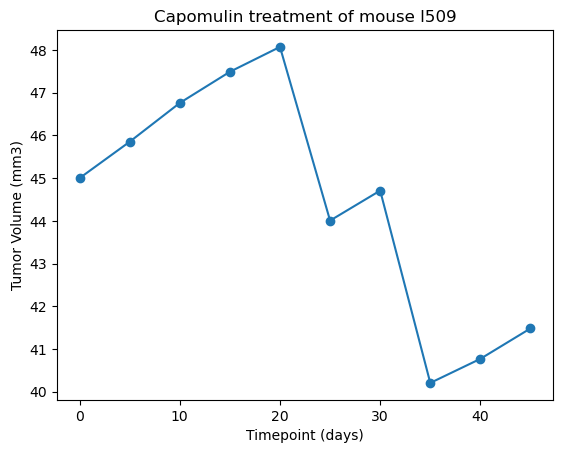

In [23]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capo = no_duplicates[(no_duplicates['Drug Regimen'] == 'Capomulin') & (no_duplicates['Mouse ID'] == 'l509')]
time = capo['Timepoint']
vol = capo['Tumor Volume (mm3)']
plt.scatter(time, vol)
plt.plot(time, vol, linestyle='-')
plt.title('Capomulin treatment of mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()


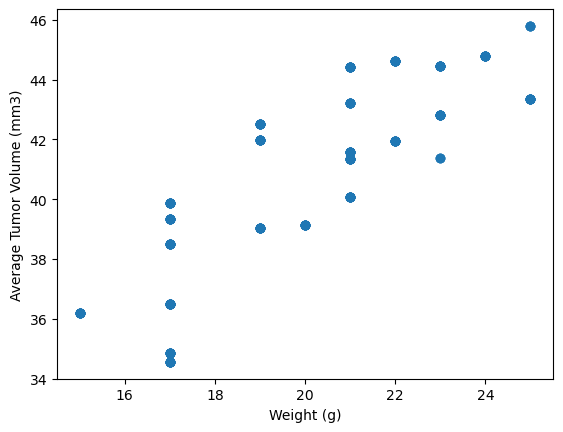

In [24]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capo = no_duplicates[(no_duplicates['Drug Regimen'] == 'Capomulin')]
ave_tumorVol = capo.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
#ave_tumorVol
combo_scatter = pd.merge(no_duplicates, ave_tumorVol, how="left", on=["Mouse ID"])
#combo_scatter
plt.scatter(combo_scatter['Weight (g)'], combo_scatter['Tumor Volume (mm3)_y'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

0       22
225     21
226     17
227     17
228     21
        ..
1849    23
1854    23
1873    24
1883    25
1884    17
Name: Weight (g), Length: 230, dtype: int64
0       41.963636
225     43.216925
226     36.509212
227     34.559143
228     40.083699
          ...    
1849    42.803733
1854    44.465236
1873    44.805810
1883    43.367364
1884    39.887495
Name: Tumor Volume (mm3)_y, Length: 230, dtype: float64


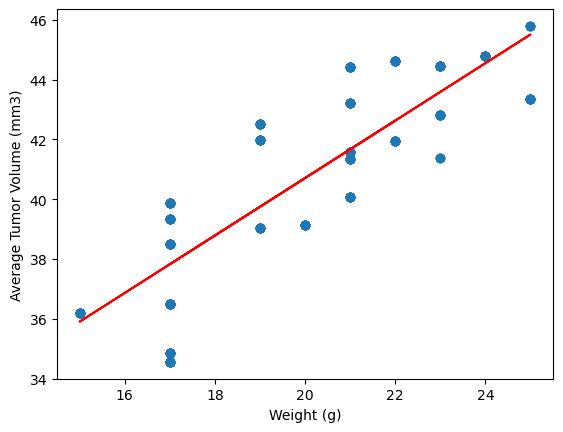

The correlation between mouse weight and the average tumor volume is 0.96


In [25]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capo = combo_scatter[(combo_scatter['Drug Regimen'] == 'Capomulin')]
x_values = capo['Weight (g)']
y_values = capo['Tumor Volume (mm3)_y']
print(x_values)
print(y_values)
c_slope, c_int, c_r, c_p, c_std_err = stats.linregress(x_values, y_values)
c_fit = c_slope * x_values + c_int

c_slope = round(c_slope, 2)
plt.scatter(x_values, y_values)
plt.plot(x_values, c_fit, '-', color='red')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
print(f'The correlation between mouse weight and the average tumor volume is {c_slope:.2f}')